## CASCADE ANALYSIS

time to peak analysis

In [84]:
lc_df = pd.read_csv("./cascade_lg.csv.gz", compression = 'gzip', sep = "|")
random_df =  pd.read_csv("./Random_cascade.csv.gz", compression = 'gzip',sep = "|")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


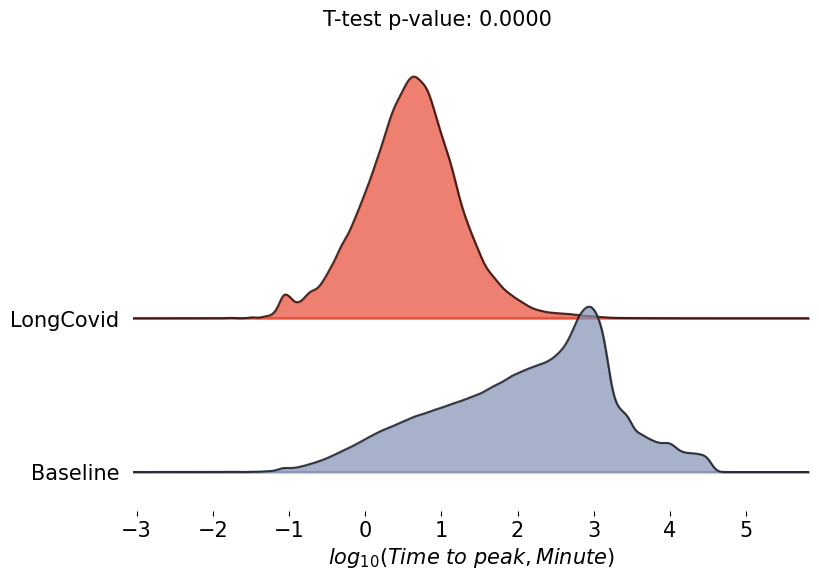

In [67]:
import joypy
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

# Define a color palette
palette10 = ["#E64B35","#4DBBD5","#00A087","#3C5488","#F39B7F","#8491B4","#91D1C2","#DC0000","#7E6148","#B09C85"]
newcmp = ListedColormap(palette10, name='palette10')

def filter_inter_times(df, peak_col='peak', inter_time_prefix='inter_time', level_range=range(1, 10)):
    """
    Filters and extracts inter_time values from a DataFrame based on matching levels in the peak column.

    Parameters:
    - df: pd.DataFrame, the input dataframe containing the peak and inter_time columns.
    - peak_col: str, the name of the column containing the peak level information.
    - inter_time_prefix: str, the prefix for the inter_time columns.
    - level_range: iterable, the range of levels to consider (default is 1 to 9).

    Returns:
    - list, the extracted inter_time values.
    """
    lst = []
    df_subset = df[df.columns[-10:]] 

    for _, row in df_subset.iterrows():
        for level in level_range:
            level_str = f'level{level}'
            inter_time_col = f'{inter_time_prefix}{level}'

            if str(row[peak_col]).endswith(level_str) and inter_time_col in df_subset.columns:
                lst.append(row[inter_time_col])
                break

    return lst

def prepare_intertime_dataframe(df, data_label, peak_col='peak', inter_time_prefix='inter_time', level_range=range(1, 10)):
    """
    Prepares a DataFrame with intertime data and corresponding labels.

    Parameters:
    - df: pd.DataFrame, the input dataframe.
    - data_label: str, label for the data source (e.g., 'LongCovid').
    - peak_col: str, name of the peak column.
    - inter_time_prefix: str, prefix for the inter_time columns.
    - level_range: iterable, range of levels to consider.

    Returns:
    - pd.DataFrame, the processed dataframe.
    """
    intertimes = filter_inter_times(df, peak_col, inter_time_prefix, level_range)
    df_intertime = pd.DataFrame(intertimes, columns=['intertime'])
    df_intertime['Data'] = data_label
    return df_intertime


lg_intertime = prepare_intertime_dataframe(lc_df, 'LongCovid')
random_intertime = prepare_intertime_dataframe(random_df, 'Baseline')

# Concatenate and process data
df_int = pd.concat([lg_intertime, random_intertime])
df_int['log_int'] = np.log10(df_int['intertime'])
df_int.dropna(inplace=True)
df_int = df_int.replace([np.inf, -np.inf], np.nan).dropna()

# Set categorical order
dow = ['LongCovid', 'Baseline']
df_int['Data'] = pd.Categorical(df_int['Data'], ordered=True, categories=dow)

# Plotting
%matplotlib inline
fig, axes = joypy.joyplot(df_int, by="Data", column='log_int', figsize=(8, 5), colormap=newcmp,
                          alpha=0.7, linewidth=1.5, overlap=2)
for ax in axes:
    ax.tick_params(axis='x', which='both', labelsize=15)
    ax.tick_params(axis='y', which='both', labelsize=15)
plt.xlabel("$log_{10}(Time\ to\ peak, Minute)$", fontsize=15)

# T-test for statistical significance
statistic, p_value = ttest_ind(lg_intertime['intertime'], random_intertime['intertime'])
plt.text(0.45, 1.1, f'T-test p-value: {p_value:.4f}', ha='center', va='center',
         transform=plt.gca().transAxes, fontsize=15,
         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

# Save the plot
# plt.savefig('joyplot_time_to_peak.png', dpi=400, bbox_inches='tight', facecolor='w')

plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encounter

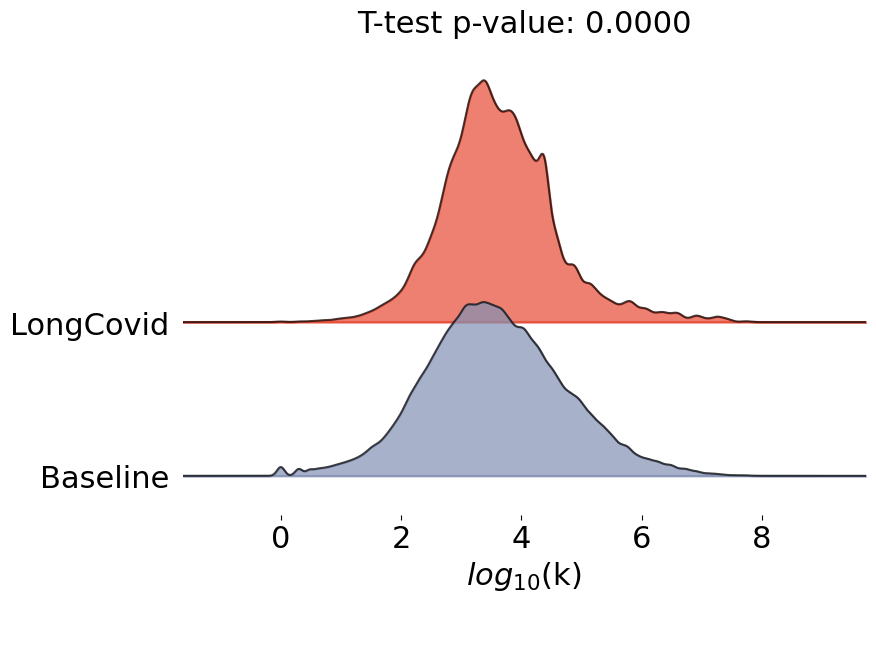

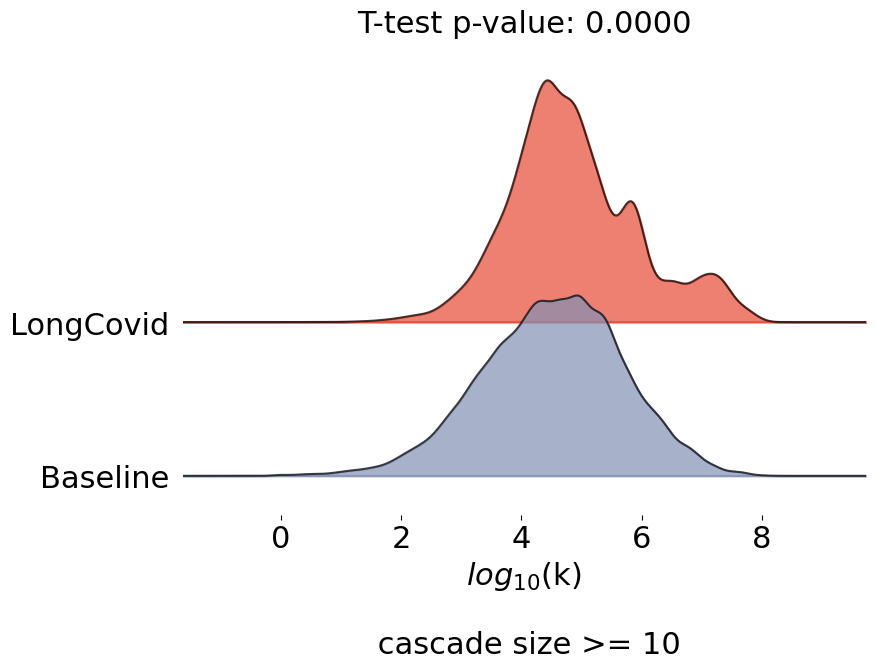

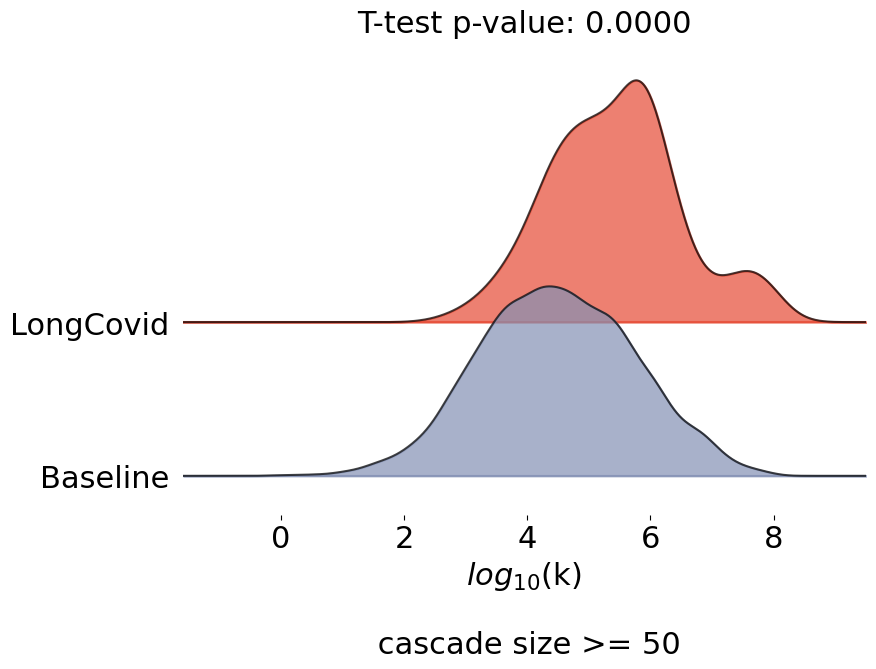

In [94]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import joypy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


palette10 = ["#E64B35", "#4DBBD5", "#00A087", "#3C5488", "#F39B7F", "#8491B4", "#91D1C2", "#DC0000", "#7E6148", "#B09C85"]
newcmp = ListedColormap(palette10, name='palette10')

lc_df = pd.read_csv("./cascade_lg.csv.gz", compression = 'gzip', sep = "|")
random_df =  pd.read_csv("./Random_cascade.csv.gz", compression = 'gzip',sep = "|")

lc_df['Data'] = 'LongCovid'
random_df['Data'] = 'Baseline'

def filter_users_by_size(df, min_users):
    """
    Filters the DataFrame for cascades with at least 'min_users' users.

    Parameters:
    - df: pd.DataFrame, input data frame with cascade information.
    - min_users: int, minimum number of users to filter the cascades.

    Returns:
    - pd.DataFrame, filtered dataframe with relevant columns.
    """
    df_filtered = df[df['total_users'] >= min_users]
    return df_filtered[['avg_degree_from_level1', 'avg_degree_to', 'Data', 'total_users']]

#from_level > average degree (K) of the first user initiating the cascade
#avg_degree_to > average degree of the users involved in the cascades

lg_10 = filter_users_by_size(lc_df, 10)
random_10 = filter_users_by_size(random_df, 10)
lg_50 = filter_users_by_size(lc_df, 50)
random_50 = filter_users_by_size(random_df, 50)
# Combine filtered data for analysis
df_all = pd.concat([lc_df, random_df])
df_all = df_all[['avg_degree_from_level1', 'avg_degree_to', 'Data', 'total_users']]
df_10 = pd.concat([lg_10, random_10])
df_50 = pd.concat([lg_50, random_50])

# Function to add log columns and clean data
def add_log_columns_and_clean(df, columns):
    for col in columns:
        df[f'{col}_log'] = np.log10(df[col])
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    return df

# Apply transformation and clean data
df_all = add_log_columns_and_clean(df_all, ['avg_degree_from_level1', 'avg_degree_to'])
df_10 = add_log_columns_and_clean(df_10, ['avg_degree_from_level1', 'avg_degree_to'])
df_50 = add_log_columns_and_clean(df_50, ['avg_degree_from_level1', 'avg_degree_to'])

# Set categorical order for plotting
order = ['LongCovid', 'Baseline']
for df in [df_all, df_10, df_50]:
    df['Data'] = pd.Categorical(df['Data'], ordered=True, categories=order)

# Function to plot joyplot and perform t-test
    def plot_joyplot(df, column, size_label, filename):
        fig, axes = joypy.joyplot(df, by="Data", column=column, figsize=(8, 5), colormap=newcmp,
                                  alpha=0.7, linewidth=1.5, overlap=2)
        for ax in axes:
            ax.tick_params(axis='x', which='both', labelsize=22)
            ax.tick_params(axis='y', which='both', labelsize=22)
        if column == 'avg_degree_from_level1_log':
            
            plt.xlabel(f'$log_{{10}}$(k) \n\n {size_label}', fontsize=22)
        else:
            plt.xlabel(f'$log_{{10}}$(Average Degree) \n\n {size_label}', fontsize=22)

        # T-test
        group1 = df[df['Data'] == 'LongCovid'][column.replace('_log', '')]
        group2 = df[df['Data'] == 'Baseline'][column.replace('_log', '')]
        statistic, p_value = ttest_ind(group1, group2)
        plt.text(0.5, 1.1, f'T-test p-value: {p_value:.4f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=22,
                 bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

        # Save the plot
        plt.savefig(filename, dpi=400, bbox_inches='tight', facecolor='w')
        plt.show()

# Plot for different cascade sizes 
plot_joyplot(df_all, 'avg_degree_from_level1_log', '', 'joyplot_node_degree_from_allcs.png')
plot_joyplot(df_10, 'avg_degree_from_level1_log', 'cascade size >= 10', 'joyplot_node_degree_from_10cs.png')
plot_joyplot(df_50, 'avg_degree_from_level1_log', 'cascade size >= 50', 'joyplot_node_degree_from_50cs.png')
